In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
from urllib.parse import urlparse
from urllib.request import urlretrieve
import os

def load_data(url, **kwargs):
    path = urlparse(url).path
    filename = os.path.basename(path)
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    return pd.read_csv(filename, **kwargs)

https://iopscience.iop.org/article/10.1088/1748-0221/3/08/S08005/pdf

In [5]:
data = load_data('https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/training.csv.gz')

In [6]:
# data = load_data('training.csv.gz')

In [7]:
data.head(10)

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087
5,62641.621090,17.0,0.976355,0.0,1.0,3.2,-2.649216,-3.767491,1.0,1.282086,...,40.0,1.0,29.475203,-3.059098,20529.441404,0.0,1.0,2.468433,-1.194598e+00,1.010202
6,18872.810570,14.0,2.345886,0.0,1.0,3.2,-3.027858,-5.173245,1.0,0.750181,...,26.0,1.0,26.711504,-3.326296,19248.388672,0.0,1.0,2.742722,-1.859796e+00,13.021704
7,1993.550048,3.0,0.170659,0.0,1.0,0.0,1.864349,0.101000,1.0,0.382705,...,13.0,0.0,0.000006,-37.474493,694.306640,0.0,1.0,-0.000015,-2.448940e-01,0.000006
8,90635.296871,8.0,-999.000000,0.0,1.0,3.2,-999.000000,0.000002,1.0,-999.000000,...,22.0,1.0,-1.552902,0.561498,-999.000000,0.0,1.0,119.856750,8.879832e-02,-3.197502
9,11633.669941,16.0,0.976349,0.0,1.0,0.0,-2.479154,-0.631769,1.0,0.449661,...,28.0,1.0,9.489098,-0.643303,913.806574,0.0,1.0,22.764572,-2.466028e-01,9.954897


In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pid.jpg)

![scheme](scheme.png)

### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is made by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is produced by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

![features](features.jpg)

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Label)
y = le.transform(data.Label).astype(np.float)
labels = np.array(le.classes_, dtype=np.str)
labels

C:\Users\72CD~1\AppData\Local\Temp/ipykernel_21132/2047965648.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = le.transform(data.Label).astype(np.float)
C:\Users\72CD~1\AppData\Local\Temp/ipykernel_21132/2047965648.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.array(le.classes_, dtype=np.str)


array(['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'], dtype='<U8')

In [ ]:
count = np.array([(data.Label == l).sum() for l in labels])
plt.figure()
plt.bar(np.arange(len(labels)), count / np.sum(count))
plt.xticks(np.arange(len(labels)), labels)
plt.show()

In [ ]:
ratio = np.array([data[data.Label == l]["MuonFlag"].sum() for l in labels]) / count
plt.figure()
plt.title("MuonFlag")
plt.bar(np.arange(len(labels)), ratio)
plt.xticks(np.arange(len(labels)), labels)
plt.show()

In [ ]:
moment = list([data[data.Label == l]["TrackP"] for l in labels])
moment = list([x[x > -998] for x in moment])
plt.title("TrackP")
plt.boxplot(moment, showfliers=False)
plt.xticks(np.arange(len(labels))+1, labels)
plt.show()

In [ ]:
energy = list([data[data.Label == l]["EcalE"] for l in labels])
energy = list([x[x > -998] for x in energy])
plt.figure()
plt.title("EcalE")
plt.boxplot(energy, showfliers=False)
plt.xticks(np.arange(len(labels))+1, labels)
plt.show()

In [ ]:
energy = list([data[data.Label == l]["HcalE"] for l in labels])
energy = list([x[x > -998] for x in energy])
plt.figure()
plt.title("HcalE")
plt.boxplot(energy, showfliers=False)
plt.xticks(np.arange(len(labels))+1, labels)
plt.show()

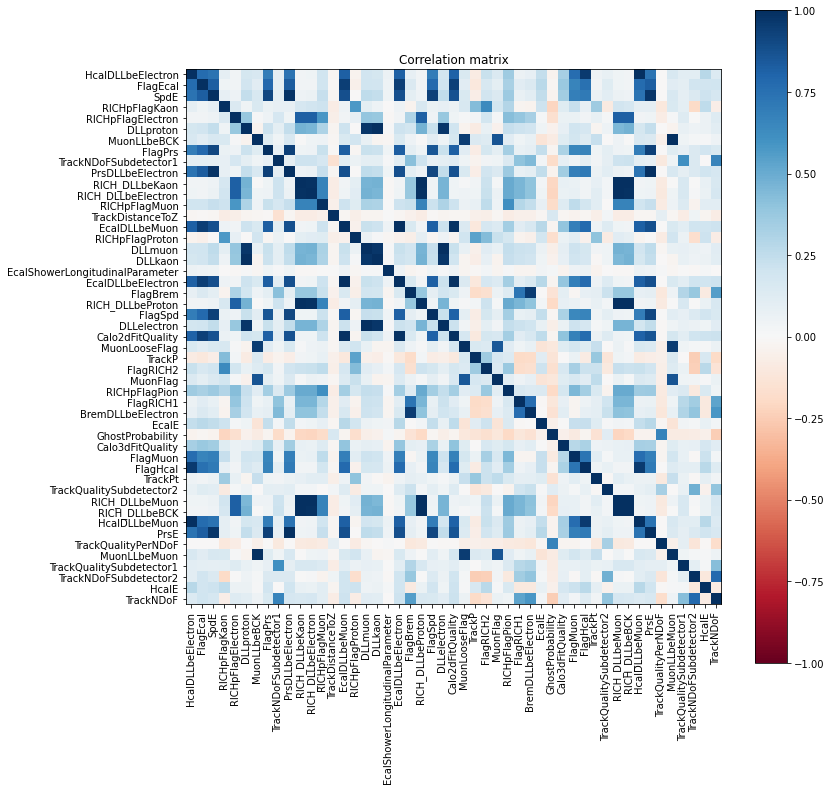

In [9]:
features = np.asarray(list(set(data.columns) - {'Label',}))

x = np.asarray(data[features])
x_cov = np.cov(x.T)
sigma = np.sqrt(np.diag(x_cov))
x_cor = x_cov / np.outer(sigma, sigma)


plt.figure(figsize=(12, 12))
vmax = 1.0
plt.imshow(x_cor, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
plt.title("Correlation matrix")
plt.colorbar()
plt.yticks(np.arange(len(features)), features)
plt.xticks(rotation=90)
_ = plt.xticks(np.arange(len(features)), features)

In [10]:
from sklearn.decomposition import PCA


In [11]:
features = np.asarray(list(set(data.columns) - {'Label'}))
x = np.asarray(data[features])
x.shape

(1200000, 49)

In [12]:
scaler = preprocessing.StandardScaler()
x_1 = scaler.fit_transform(x)
pca = PCA(n_components = 45)
x_2 = pca.fit_transform(x_1)
x_cov = np.cov(x_2.T)
sigma = np.sqrt(np.diag(x_cov))
x_cor = x_cov / np.outer(sigma, sigma)
# x_new = np.where(x_cor >= 1-1e-2,1,0)
x_2.shape

(1200000, 45)

In [13]:
pd.DataFrame(x_cor)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.000000e+00,-5.933482e-14,8.252911e-14,-1.886690e-14,-3.577684e-14,3.228326e-14,-1.729546e-15,-4.935575e-14,-3.027148e-14,9.373141e-15,...,-8.647124e-15,4.032682e-16,-3.985022e-14,4.603690e-15,5.841164e-16,1.058261e-15,-1.306914e-16,-9.290599e-17,-2.655230e-18,2.736040e-16
1,-5.933482e-14,1.000000e+00,-3.043777e-14,1.787315e-14,-1.176292e-14,4.741812e-14,1.094807e-15,1.527069e-14,2.309576e-14,-6.963111e-15,...,2.967226e-15,-3.582835e-16,8.636219e-15,-1.468188e-15,4.141778e-16,3.456997e-16,-1.370162e-17,1.203983e-16,5.387238e-17,-9.225107e-17
2,8.252911e-14,-3.043777e-14,1.000000e+00,-2.346746e-14,1.219383e-14,1.314186e-14,4.095967e-15,-5.159903e-14,-6.955178e-14,-3.494289e-14,...,-5.855173e-15,-1.084189e-17,8.292684e-15,1.789177e-15,3.251247e-16,3.741768e-16,4.320566e-16,-1.695212e-16,-1.017297e-16,1.757994e-16
3,-1.886690e-14,1.787315e-14,-2.346746e-14,1.000000e+00,-6.814851e-15,1.406429e-14,-3.783361e-16,1.980076e-14,3.025261e-14,1.614734e-14,...,2.136471e-15,7.442722e-16,-9.716922e-15,-6.636627e-17,5.934357e-16,5.556497e-17,-3.393057e-16,1.326329e-16,-6.385254e-17,1.265908e-16
4,-3.577684e-14,-1.176292e-14,1.219383e-14,-6.814851e-15,1.000000e+00,1.307818e-14,-2.550785e-16,3.930010e-15,1.223962e-14,1.102296e-14,...,3.720771e-16,1.909979e-16,-1.370109e-14,4.314327e-16,1.904052e-15,7.609504e-16,2.057614e-16,2.498573e-16,8.276873e-17,-1.194449e-16
5,3.228326e-14,4.741812e-14,1.314186e-14,1.406429e-14,1.307818e-14,1.000000e+00,4.317613e-15,2.384301e-15,2.125016e-15,-2.714337e-15,...,5.437818e-16,8.642555e-16,4.706331e-15,-5.315808e-16,-1.884535e-15,-1.117340e-15,1.557322e-16,-1.082067e-16,-7.674909e-18,-3.943279e-16
6,-1.729546e-15,1.094807e-15,4.095967e-15,-3.783361e-16,-2.550785e-16,4.317613e-15,1.000000e+00,3.270192e-15,3.497166e-15,4.172668e-15,...,-1.591354e-16,1.611056e-16,-2.490317e-15,-9.219092e-18,-1.463321e-16,4.535475e-16,1.942172e-16,5.916924e-17,8.776797e-17,-1.459938e-16
7,-4.935575e-14,1.527069e-14,-5.159903e-14,1.980076e-14,3.930010e-15,2.384301e-15,3.270192e-15,1.000000e+00,5.437594e-14,1.644208e-14,...,8.321657e-15,-6.436770e-16,2.030614e-14,-2.941786e-15,-2.247333e-16,-1.295651e-15,1.988943e-16,2.520756e-16,1.523986e-16,-5.386490e-16
8,-3.027148e-14,2.309576e-14,-6.955178e-14,3.025261e-14,1.223962e-14,2.125016e-15,3.497166e-15,5.437594e-14,1.000000e+00,-6.451217e-16,...,9.757333e-15,-2.081852e-15,4.396108e-14,-4.402252e-15,-2.345635e-16,-1.739531e-15,7.562797e-16,3.876643e-16,3.953580e-16,-8.745077e-16
9,9.373141e-15,-6.963111e-15,-3.494289e-14,1.614734e-14,1.102296e-14,-2.714337e-15,4.172668e-15,1.644208e-14,-6.451217e-16,1.000000e+00,...,4.925512e-15,6.860340e-16,3.492375e-14,-2.728034e-15,-3.935923e-16,-2.082844e-15,6.841675e-16,3.365807e-16,2.207185e-16,-8.517322e-16


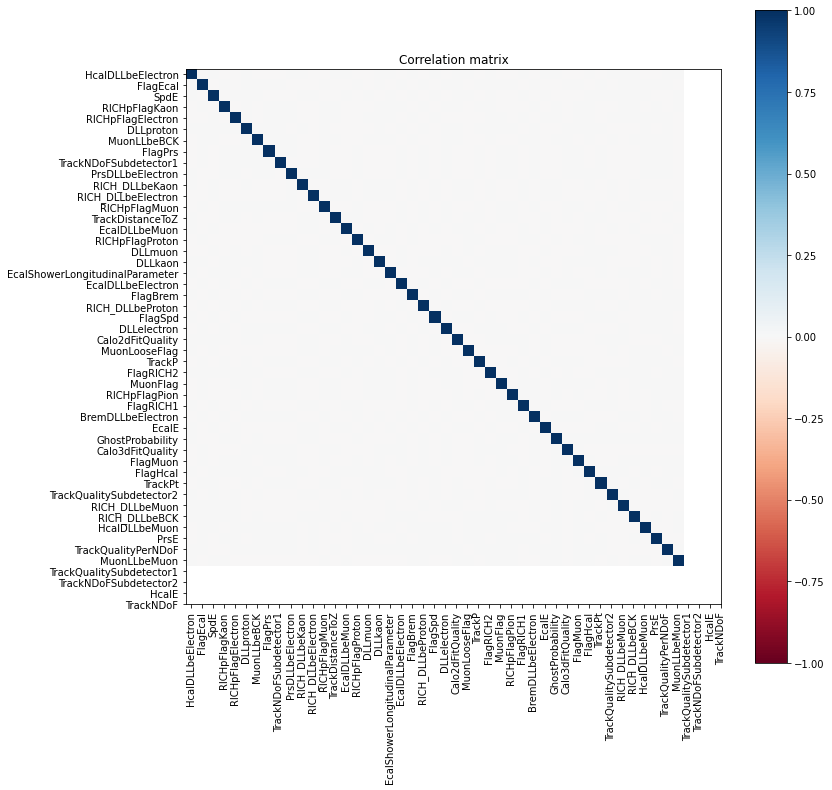

In [14]:
plt.figure(figsize=(12, 12))
vmax = 1.0
plt.imshow(x_cor, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
plt.title("Correlation matrix")
plt.colorbar()
plt.yticks(np.arange(len(features)), features)
plt.xticks(rotation=90)
_ = plt.xticks(np.arange(len(features)), features)

In [15]:
pd.DataFrame(x_2)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-2.382761,-0.018156,4.500467,1.866249,-0.684188,0.309317,0.869407,1.230324,0.506913,-0.125740,...,0.029141,-0.011649,0.029571,0.044361,-0.093000,-0.006893,-0.001088,0.001074,0.013251,-0.024641
1,-1.006250,-0.108295,-2.579813,-0.023647,-0.785283,-1.571104,3.884341,-1.062667,1.412661,0.401341,...,-0.306719,-0.078528,0.018388,0.007099,-0.010835,0.023161,-0.040481,0.005541,-0.008732,0.007092
2,16.294622,12.748244,1.076258,5.410109,8.903444,-4.320216,-0.242836,0.048023,-0.536215,0.474627,...,0.067823,-0.156087,-0.005157,0.005775,-0.008951,0.012399,0.001205,0.005709,-0.006855,-0.001039
3,-2.223635,-0.278895,-0.986851,0.890199,2.077564,1.458474,0.485882,-1.462966,-0.569320,0.420124,...,-0.096369,-0.254041,-0.032094,0.032876,0.037257,-0.021463,0.045913,0.029836,-0.075126,-0.000648
4,-1.787019,-0.231206,-1.562653,0.082730,0.359926,-0.247719,-1.843965,0.810194,-0.167647,-0.634005,...,0.064277,0.032870,-0.004390,0.009892,-0.022008,-0.019004,0.012422,0.012862,-0.016364,-0.004551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,0.233246,-1.261795,-2.396144,1.276230,0.189843,0.231568,-1.052198,1.330522,0.846766,0.977638,...,-0.026368,-0.016581,-0.012942,-0.216870,0.016232,-0.026831,-0.014066,-0.029276,-0.007618,0.002077
1199996,3.299861,10.975299,-2.044899,-1.294520,-3.933902,3.124783,0.681648,0.527111,-0.262857,-0.241598,...,0.060062,-0.247642,0.003592,-0.002714,-0.001870,0.002547,-0.021273,-0.012124,-0.007501,0.008721
1199997,7.185972,-3.576797,2.213099,-2.318675,-0.175771,0.639619,-1.292190,-0.198837,-0.032771,-0.101357,...,-0.125568,0.266145,0.008888,0.001310,0.031366,-0.003947,0.004250,0.008980,0.000444,0.002852
1199998,-2.332504,0.077229,1.595233,2.884464,-1.943274,-1.483002,-1.640304,0.331508,-0.463806,-0.002263,...,0.015038,0.001395,0.025651,0.009366,0.014008,-0.086083,0.000446,0.086082,0.015776,0.027675


## Логистическая регрессия

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_2, y, random_state=42)

In [17]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression

In [ ]:


roc = {}
auc = {}
models = []
for l, label in enumerate(tqdm(labels)):
    one_y_train = np.asarray((y_train == l).astype(np.float))

    c = LogisticRegression(n_jobs=-1)
    c.fit(x_train, one_y_train.reshape(-1))
    models.append(c)

In [ ]:
for l, label in enumerate(tqdm(labels)):
    one_y_test = np.asarray((y_test == l).astype(np.float))
    c = models[l]

    y_pred = c.predict(x_test)
    scores = c.decision_function(x_test)

    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, scores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, scores)

### График ROC

In [ ]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

### Распределение скоров для настоящих классов

Пример не очень хорошего классификатора. Распределения двух классов перекрываются по горизонтальной оси.

In [ ]:
с = models[0]
scores = c.decision_function(x_test)
plt.hist(scores[y_test == 0], label='Electron', alpha=0.5)
plt.hist(scores[y_test != 0], label='Non-electron', alpha=0.5)
plt.legend(loc='upper right')

## Нейросети

In [ ]:
!pip install tensorflow

In [18]:
import tensorflow as tf
tf.random.set_seed(143)

In [27]:
INPUT_DIM  = x_train.shape[1]
HIDDEN_DIM = 150
HIDDEN_DIM1 = 250
OUTPUT_DIM = len(labels)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(HIDDEN_DIM1, activation="hard_sigmoid"),
    tf.keras.layers.Dense(HIDDEN_DIM1, activation="selu"),
    tf.keras.layers.Dense(HIDDEN_DIM, activation="tanh"),
    tf.keras.layers.Dense(OUTPUT_DIM, activation="softmax"),
])

learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=[
                  'accuracy',
                  tf.keras.metrics.AUC()
              ])

model.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes=len(labels)),
          epochs=5, batch_size=25,
          validation_data=(x_test, tf.keras.utils.to_categorical(y_test, num_classes=len(labels)))
         )

Epoch 1/5
36000/36000 [==============================] - 151s 4ms/step - loss: 0.7471 - accuracy: 0.7036 - auc_3: 0.9437 - val_loss: 0.6640 - val_accuracy: 0.7339 - val_auc_3: 0.9556
Epoch 2/5
36000/36000 [==============================] - 157s 4ms/step - loss: 0.6579 - accuracy: 0.7331 - auc_3: 0.9558 - val_loss: 0.6516 - val_accuracy: 0.7315 - val_auc_3: 0.9565
Epoch 3/5
36000/36000 [==============================] - 143s 4ms/step - loss: 0.6376 - accuracy: 0.7398 - auc_3: 0.9583 - val_loss: 0.6316 - val_accuracy: 0.7423 - val_auc_3: 0.9592
Epoch 4/5
36000/36000 [==============================] - 138s 4ms/step - loss: 0.6252 - accuracy: 0.7439 - auc_3: 0.9599 - val_loss: 0.6159 - val_accuracy: 0.7466 - val_auc_3: 0.9610
Epoch 5/5
36000/36000 [==============================] - 139s 4ms/step - loss: 0.6168 - accuracy: 0.7468 - auc_3: 0.9609 - val_loss: 0.6255 - val_accuracy: 0.7411 - val_auc_3: 0.9599


In [28]:
import sklearn

In [29]:
scores = model.predict(x_test)

roc = {}
auc = {}
for l, label in enumerate(labels):
    lscores = scores[:,l]
    one_y_test = np.asarray((y_test == l).astype(np.float))
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

9375/9375 [==============================] - 19s 2ms/step


C:\Users\72CD~1\AppData\Local\Temp/ipykernel_21132/1817061742.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_y_test = np.asarray((y_test == l).astype(np.float))
C:\Users\72CD~1\AppData\Local\Temp/ipykernel_21132/1817061742.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_y_test = np.asarray((y_test == l).astype(np.float))


### График ROC

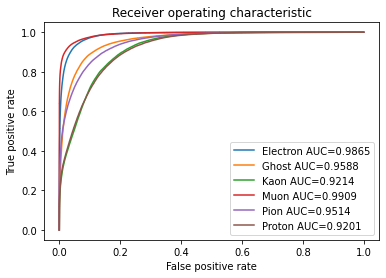

In [30]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

### Распределение скоров для настоящих классов

Видно, что электроны кучкуются в правой части графика, а не электроны кучкуются в левой части. Уже лучше, но в середине они все-равно перекрываются.

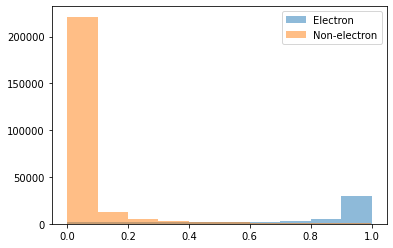

In [23]:
plt.hist(scores[y_test == 0, 0], label='Electron', alpha=0.5)
plt.hist(scores[y_test != 0, 0], label='Non-electron', alpha=0.5)
plt.legend(loc='upper right')

### Матрица ошибок

Видно, например, что каоны путаются с протонами.

9375/9375 [==============================] - 19s 2ms/step
              precision    recall  f1-score   support

    Electron       0.85      0.87      0.86     49983
       Ghost       0.70      0.81      0.75     49964
        Kaon       0.72      0.44      0.54     49901
        Muon       0.90      0.89      0.90     50344
        Pion       0.71      0.73      0.72     49894
      Proton       0.58      0.68      0.62     49914

    accuracy                           0.74    300000
   macro avg       0.74      0.74      0.73    300000
weighted avg       0.74      0.74      0.73    300000



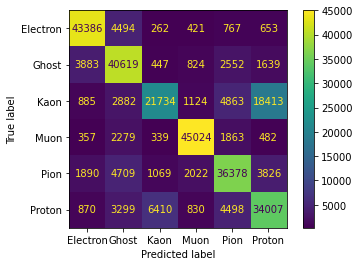

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = y_test
y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()